# Titanic: Machine Learning from Disaster
### Start here! Predict survival on the Titanic and get familiar with ML basics

#### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading data

In [2]:
df=pd.read_csv("titanic_train.csv")


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [ ]:
df.info()

**we found here age,cabin,embarked has null values**

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Dealing with null values in Age column with mean Age

In [8]:
df['Age']=df['Age'].replace(np.NaN,df['Age'].mean())


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Analyzing Data

## Survived based on gender

In [10]:
print("total_female =",df[df['Sex']=="female"].shape[0])
print("total_male =",df[df['Sex']=="male"].shape[0])


total_female = 314
total_male = 577


In [11]:
# males Survived
male_sur=df[(df['Sex']=="male") & (df['Survived']==1)]
print("total_males_survived =",male_sur.shape[0])

total_males_survived = 109


In [12]:
# females Survived
feamales_survived=df[(df["Sex"]=="female") & (df["Survived"]==1)]
print("total_females_survived =",feamales_survived.shape[0])

total_females_survived = 233


In [13]:
df.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

**Here we can see total 74% females were survived and only 0.18% male were Survived**

females were survived more than the mens

In [ ]:
df.groupby('Sex')['Survived'].value_counts().plot()
plt.title("no of males and females that survived")

Text(0.5, 1.0, 'percentage of survived')

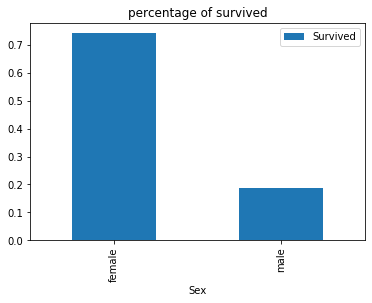

In [14]:
pivot_table=df.pivot_table(index="Sex",values="Survived")
pivot_table.plot(kind="bar")
plt.title("percentage of survived")

## Survived based on passenger class

In [15]:
df.groupby('Pclass')['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Passenger survived from each class')

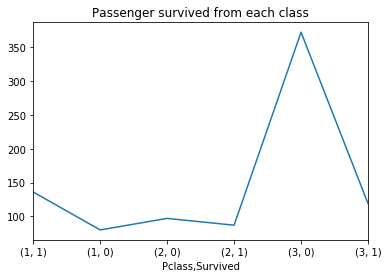

In [16]:
df.groupby('Pclass')['Survived'].value_counts().plot()
plt.title("Passenger survived from each class")

In [17]:
table=df.pivot_table(index="Pclass",values="Survived")
table

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


**can clearly say passenger from 1st class survived more with the percentage of 62.96**

Text(0.5, 1.0, 'percentage of survived from each class')

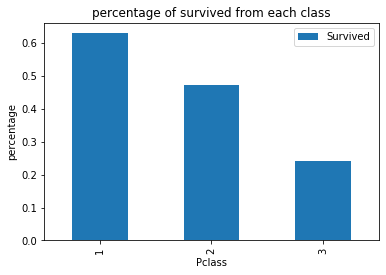

In [18]:
table.plot(kind="bar")
plt.ylabel("percentage")
plt.title("percentage of survived from each class")

In [19]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


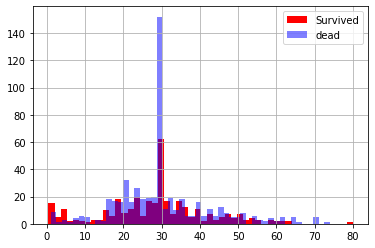

In [20]:
# how age factor related to survival
survive=df[df['Survived']==1]
dead=df[df['Survived']==0]
survive['Age'].hist(color="red",bins=50)
dead['Age'].hist(alpha=0.5,color="blue",bins=50)
plt.legend(['Survived','dead'])
plt.show()

### Survived based on Embarked

In [21]:
pivot_table=df.pivot_table(index="Embarked",values="Survived")
pivot_table

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


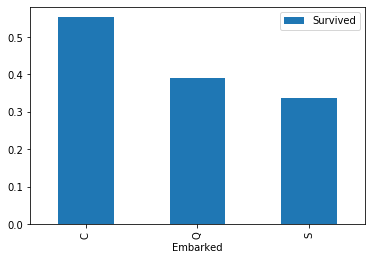

In [22]:
pivot_table.plot(kind="bar")

**so we can say the important features are :**
    
    Pclass
    sex 
    age
    Embarked

In [23]:
data=df.copy()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Embarked coloumn has missing value and sex,Embarked are categorical variable so we need to conver it**

In [25]:
data=data.dropna(subset=['Embarked'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


## Fitting classification model for prediction

#### making data ready for our prediction

In [27]:
train=pd.read_csv("titanic_train.csv")
test=pd.read_csv("titanic_test.csv")
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
# droping columns that are not in used
train=train.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1)
test=test.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1)


In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S


In [31]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked
0,892,3,male,34.5,Q
1,893,3,female,47.0,S
2,894,2,male,62.0,Q
3,895,3,male,27.0,S
4,896,3,female,22.0,S


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 41.8+ KB


In [33]:
train=train.dropna(subset=['Age','Embarked'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Sex            712 non-null object
Age            712 non-null float64
Embarked       712 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 38.9+ KB


#### Sex and Embarked coloumn has categorical variable we need to convert it


In [34]:
# converting sex as[0,1] for train column
from sklearn.preprocessing import LabelEncoder
lb_x=LabelEncoder()
train['Sex']=lb_x.fit_transform(train['Sex'])
test['Sex']=lb_x.fit_transform(test['Sex'])


In [35]:
# converting Embarked column for train_column
train['Embarked']=lb_x.fit_transform(train['Embarked'])
test['Embarked']=lb_x.fit_transform(test['Embarked'])


**Now our data is ready for training**

In [36]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,1,22.0,2
1,2,1,1,0,38.0,0
2,3,1,3,0,26.0,2
3,4,1,1,0,35.0,2
4,5,0,3,1,35.0,2


In [37]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked
0,892,3,1,34.5,1
1,893,3,0,47.0,2
2,894,2,1,62.0,1
3,895,3,1,27.0,2
4,896,3,0,22.0,2


In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            332 non-null float64
Embarked       418 non-null int32
dtypes: float64(1), int32(2), int64(2)
memory usage: 13.1 KB


In [78]:
test['Age']=test['Age'].replace(np.NaN,df['Age'].mean())

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
Embarked       418 non-null int32
dtypes: float64(1), int32(2), int64(2)
memory usage: 13.1 KB


### Now our data ready for prediction

In [55]:
features=['Pclass','Sex','Age','Embarked']
target='Survived'

In [56]:
train[features].head(3)

,Pclass,Sex,Age,Embarked
0,3,1,22.0,2
1,1,0,38.0,0
2,3,0,26.0,2


In [57]:
train[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 4 columns):
Pclass      712 non-null int64
Sex         712 non-null int32
Age         712 non-null float64
Embarked    712 non-null int32
dtypes: float64(1), int32(2), int64(1)
memory usage: 22.2 KB


In [60]:
train[target].head(3).values

array([0, 1, 1], dtype=int64)

In [74]:
test[features].head(3)

,Pclass,Sex,Age,Embarked
0,3,1,34.5,1
1,3,0,47.0,2
2,2,1,62.0,1


In [81]:
test[features].head(3)

,Pclass,Sex,Age,Embarked
0,3,1,34.5,1
1,3,0,47.0,2
2,2,1,62.0,1


In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(train[features])
sc.fit_transform(test[features])

array([[ 0.87348191,  0.75592895,  0.29854934, -0.47091535],
       [ 0.87348191, -1.32287566,  1.18132793,  0.70076689],
       [-0.31581919,  0.75592895,  2.24066224, -0.47091535],
       ...,
       [ 0.87348191,  0.75592895,  0.58103849,  0.70076689],
       [ 0.87348191,  0.75592895,         nan,  0.70076689],
       [ 0.87348191,  0.75592895,         nan, -1.64259759]])

## Fitting Knn Algorithm in data set for the prediction


In [98]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(train[features],train[target])

KNeighborsClassifier(n_neighbors=4)

In [99]:
predictions = clf.predict(test[features])
predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [100]:
result=pd.DataFrame({'Passengerid':test['PassengerId'],'Survived':predictions})

In [103]:
result.head()

,Passengerid,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [96]:
result.to_csv('titanic_knearest_neighbour_classifier.csv',index=False)

In [97]:
pred=pd.read_csv("titanic_knearest_neighbour_classifier.csv")
pred.head()

,Passengerid,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
